# SVM支援向量機演算法(監督式)support vector machine:簡單來說式一個二元分類器


shape of data: (1797, 64)


0.9777777777777777

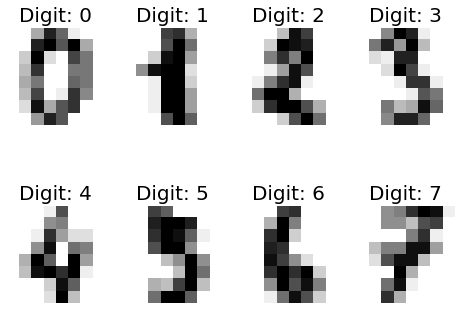

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()  #範例資料

#取前八筆，顯示標記與圖片
images_and_labels = list(zip(digits.images, digits.target))   #images影像 #images的答案,ex:是1,2,...0
plt.figure(figsize=(8, 6))
for index, (image, label) in enumerate(images_and_labels[:8]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')  
    plt.title('Digit: %i' % label, fontsize=20);

#print("shape of raw image data: {0}".format(digits.images.shape))
#print(digits.data)
print("shape of data: {0}".format(digits.data.shape)) #64個特徵

#區分訓練資料與測試資料
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(digits.data, digits.target,
                                                test_size=0.20, random_state=2)
#建立 SVM 模型
from sklearn import svm
model = svm.SVC(gamma=0.001, C=100., probability=True) #C-Support Vector Classification. 越大越能容忍錯誤
model.fit(Xtrain, Ytrain)
model.score(Xtest, Ytest)

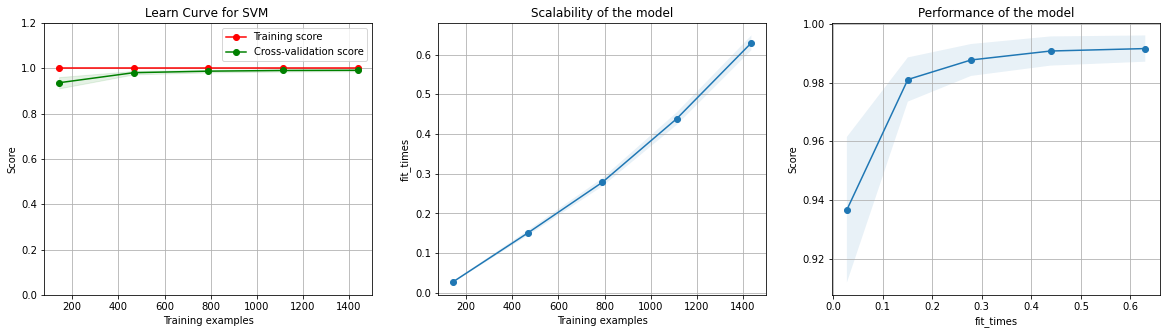

In [3]:
#繪製學習曲線圖
from sklearn.model_selection import ShuffleSplit
from plot_learning_curve import plot_learning_curve

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0) #驗證器

plt_learn = plot_learning_curve(model, "Learn Curve for SVM ",
                    digits.data, digits.target, ylim=(0., 1.2), cv=cv)


In [4]:
#精確度
from sklearn.metrics import accuracy_score
Ypred = model.predict(Xtest)
print(accuracy_score(Ytest, Ypred))

#完整模型評估報告
from sklearn.metrics import classification_report
print(classification_report(Ytest, Ypred))


0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.98      1.00      0.99        44
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        36
           4       1.00      0.91      0.96        35
           5       0.98      1.00      0.99        43
           6       1.00      0.97      0.99        35
           7       1.00      1.00      1.00        40
           8       0.87      0.94      0.91        36
           9       0.96      0.93      0.95        28

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360



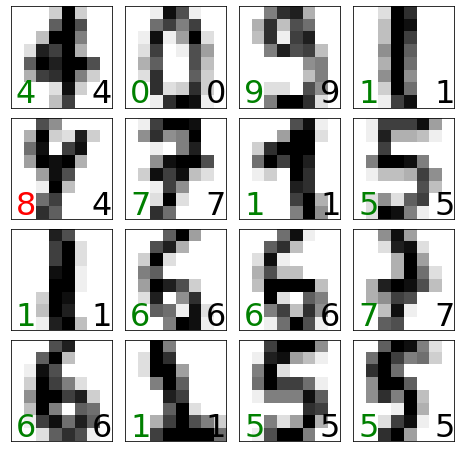

In [5]:
#顯示預測狀況圖片
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    ax.imshow(Xtest[i].reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.text(0.05, 0.05, str(Ypred[i]), fontsize=32,
            transform=ax.transAxes,
            color='green' if Ypred[i] == Ytest[i] else 'red')
    ax.text(0.8, 0.05, str(Ytest[i]), fontsize=32,
            transform=ax.transAxes,
            color='black')
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()